In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_rows', 500)

## Data Preparation

* focus is always to understand the final data
* support each step by visual analytics

## Johns Hopkins GITHUB csv data

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344


In [3]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/26/20', '7/27/20', '7/28/20', '7/29/20', '7/30/20', '7/31/20',
       '8/1/20', '8/2/20', '8/3/20', '8/4/20'],
      dtype='object', length=196)

In [4]:
time_index = pd_raw.columns[4:]
df_plot = pd.DataFrame({'date':time_index})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [5]:
len(pd_raw['Country/Region'].unique())

188

In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [7]:
pd_raw[pd_raw['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
131,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,1435616,1480073,1531669,1581963,1634746,1695988,1750723,1803695,1855745,1908254


In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         1
1/28/20         4
1/29/20         4
1/30/20         4
1/31/20         5
2/1/20          8
2/2/20         10
2/3/20         12
2/4/20         12
2/5/20         12
2/6/20         12
2/7/20         13
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        16
2/12/20        16
2/13/20        16
2/14/20        16
2/15/20        16
2/16/20        16
2/17/20        16
2/18/20        16
2/19/20        16
2/20/20        16
2/21/20        16
2/22/20        16
2/23/20        16
2/24/20        16
2/25/20        17
2/26/20        27
2/27/20        46
2/28/20        48
2/29/20        79
3/1/20        130
3/2/20        159
3/3/20        196
3/4/20        262
3/5/20        482
3/6/20        670
3/7/20        799
3/8/20       1040
3/9/20       1176
3/10/20      1457
3/11/20      1908
3/12/20      2078
3/13/20      3675
3/14/20      4585
3/15/20      5795
3/16/20      7272
3/17/20   

In [9]:
  country_list =['Germany', 'US', 'Italy', 'France','India']

In [10]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [11]:
df_plot

,date,Germany,US,Italy,France,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,2,0
3,1/25/20,0,2,0,3,0
4,1/26/20,0,5,0,3,0
5,1/27/20,1,5,0,3,0
6,1/28/20,4,5,0,4,0
7,1/29/20,4,5,0,5,0
8,1/30/20,4,5,0,5,1
9,1/31/20,5,7,2,5,1


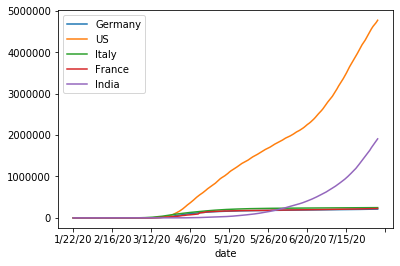

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type - Date

In [13]:
type(df_plot.date[0])

str

In [14]:
df_plot.head()

,date,Germany,US,Italy,France,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,2,0
3,1/25/20,0,2,0,3,0
4,1/26/20,0,5,0,3,0


In [15]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [16]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] #step 1 convert str to datetime
time_str = [each.strftime('%Y-%m-%d') for each in time_idx] #step 2 : convert back datetime object to ISO norm Str

In [17]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';', index=False)

## Relationl data model

In [19]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344


In [20]:
type(pd_raw)

pandas.core.frame.DataFrame

In [21]:
pd_data_base = pd_raw.rename(columns={'Country/Region': 'country',
                                      'Province/State': 'state'})

In [22]:
pd_data_base

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,82,86,86,91,91,91,91,91,92,92
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,162526,167416,173355,178996,185373,191302,196543,201919,206743,213535
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,37317,37390,37629,37937,38196,38550,38841,39050,39102,39298
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3685,3699,3718,3736,3756,3773,3784,3797,3809,3820


In [23]:
pd_data_base = pd_data_base.drop(['Lat','Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,0,0,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,NaN,Angola,0,0,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344


In [24]:
#test_pd = pd_data_base.set_index(['state','country']).T
#test_pd

In [25]:
#test_pd.columns

In [26]:
#test_pd.stack(level=[0,1])

In [27]:
pd_relational_model = pd_data_base.set_index(['state','country'])\
                                  .T                             \
                                  .stack(level=[0,1])            \
                                  .reset_index()                 \
                                  .rename(columns={'level_0':'date',
                                                  0:'confirmed'})

In [28]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [29]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [30]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [31]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [32]:
df_plot.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')